In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os

# Compare binning scenarios for data in CA

In [2]:
data_dir = '/ihme/scratch/users/beatrixh/synthetic_pop/pyomo/best/ca/'

In [4]:
len(os.listdir(data_dir))

7959

In [8]:
def read_dir(state):
    in_dir = '/ihme/scratch/users/beatrixh/synthetic_pop/pyomo/best/{}/'.format(state)
    files = os.listdir(in_dir)
    
    df = pd.DataFrame()
    i = 0
    for file in files:
        df_0 = pd.read_csv(in_dir + file)
        df = df.append(df_0)
        
        i += 1
        
        if i % 1_000 == 0:
            print(f'{i} complete')
    return df

In [9]:
%%time
df = read_dir('ca')

1000 complete
2000 complete
3000 complete
4000 complete
5000 complete
6000 complete
7000 complete
CPU times: user 1h 44min 30s, sys: 2h 56min 44s, total: 4h 41min 15s
Wall time: 4h 41min 41s


In [12]:
df.head()

,state,county,tract,block,geoid,age,sex_id,relationship,hispanic,racaian,racasn,racblk,racnhpi,racsor,racwht,pweight
0,6,73,17041,1000,60730170411000,3,1,2,0,0,0,0,0,0,1,1
1,6,73,17041,1000,60730170411000,2,1,7,0,0,0,0,0,0,1,1
2,6,73,17041,1000,60730170411000,4,1,2,0,0,0,0,0,0,1,1
3,6,73,17041,1001,60730170411001,2,1,2,0,0,0,0,0,0,1,1
4,6,73,17041,1002,60730170411002,1,1,2,0,0,0,0,0,0,1,1


In [13]:
backup = df.copy()

In [10]:
cd /ihme/code/beatrixh/microsim_2020/census_2020/synthetic_pop/viz

/ihme/code/beatrixh/microsim_2020/census_2020/synthetic_pop/viz


In [11]:
from viz_binning import *

In [14]:
df = add_race_vars(df)

In [15]:
hi = pd.DataFrame({'n':[0, 1, 2, 3, 4, 5, 10, 15, 20, 25]})
hi['hi_baseline'] = [find_n_hi(df,n) for n in hi.n]

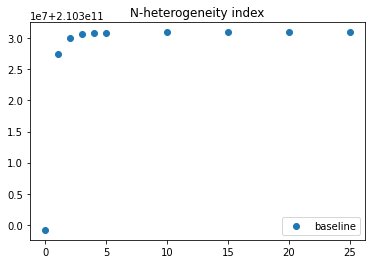

In [16]:
plt.scatter(hi.n,hi.hi_baseline, label = 'baseline')

plt.title('N-heterogeneity index')
plt.legend()
plt.show()

## compare race binning 

In [17]:
three_plus = df.copy()
# overwrite all multiracial people of >= 3 races
three_plus.loc[(three_plus.racsum >= 3),'race_detail'] = 'three_plus'
#bin data
three_plus = agg_data(three_plus)


four_plus = df.copy()
# overwrite all multiracial people of >= 4 races
four_plus.loc[(four_plus.racsum >= 4),'race_detail'] = 'four_plus'
#bin data
four_plus = agg_data(four_plus)

In [18]:
n_race = 6 + nCk(6,2) + 1
n_bins = count_bins(three_plus, n_race = n_race)
hi['hi_bin_3plus_races'] = [find_n_hi(three_plus, n, n_bins = n_bins) for n in hi.n]

In [19]:
n_race = 6 + nCk(6,2) + nCk(6,3) + 1
n_bins = count_bins(four_plus, n_race = n_race)
hi['hi_bin_4plus_races'] = [find_n_hi(four_plus, n, n_bins = n_bins) for n in hi.n]

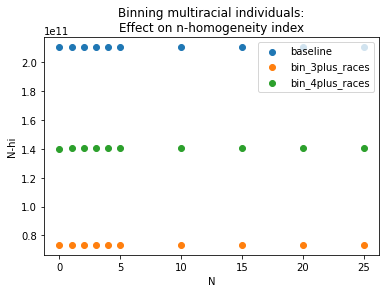

In [20]:
plt.scatter(hi.n,hi.hi_baseline, label = 'baseline')
plt.scatter(hi.n,hi.hi_bin_4plus_races, label = 'bin_4plus_races')
plt.scatter(hi.n,hi.hi_bin_3plus_races, label = 'bin_3plus_races')


plt.legend()
plt.title('Binning multiracial individuals:\nEffect on n-homogeneity index')
plt.xlabel('N')
plt.ylabel('N-hi')
plt.show()

## compare age binning 

In [21]:
# create age_start col
age_map = pd.DataFrame(data = np.arange(0,116), columns=['age'])
age_map['a1_age_start'] = [i if i < 85 else (i - i%5) if i < 100 else 100 for i in age_map.age]
age_map['a2_age_start'] = [i if i < 90 else (i- i%5) if i < 100 else 100 for i in age_map.age]
age_map['a3_age_start'] = [i if i < 90 else 90 for i in age_map.age]

In [22]:
df = df.merge(age_map, on = 'age', how = 'left')

a1 = agg_data(df, age_var = 'a1_age_start')
a2 = agg_data(df, age_var = 'a2_age_start')
a3 = agg_data(df, age_var = 'a3_age_start')

In [23]:
a1.head()

,state,county,tract,block,geoid,a1_age_start,sex_id,relationship,hispanic,race_detail,pweight
0,6.0,1.0,400200.0,1000.0,60014002001000,4,2,2,0,racaian0_racasn1_racblk0_racnhpi0_racsor0_racwht1,1
1,6.0,1.0,400200.0,1000.0,60014002001000,5,1,2,0,racaian0_racasn0_racblk1_racnhpi0_racsor0_racwht1,1
2,6.0,1.0,400200.0,1000.0,60014002001000,6,1,2,0,racaian0_racasn0_racblk0_racnhpi0_racsor0_racwht1,1
3,6.0,1.0,400200.0,1000.0,60014002001000,7,1,2,0,racaian1_racasn0_racblk0_racnhpi0_racsor0_racwht1,1
4,6.0,1.0,400200.0,1000.0,60014002001000,7,2,2,0,racaian0_racasn0_racblk1_racnhpi0_racsor0_racwht1,1


In [26]:
n_age = age_map.a1_age_start.nunique()
n_bins = count_bins(a1, n_age = n_age)
hi['hi_a1_age_binning'] = [find_n_hi(a1, n, n_bins = n_bins, age = 'a1_age_start') for n in hi.n]

In [27]:
n_age = age_map.a2_age_start.nunique()
n_bins = count_bins(a2, n_age = n_age)
hi['hi_a2_age_binning'] = [find_n_hi(a2, n, n_bins = n_bins, age = 'a2_age_start') for n in hi.n]

In [28]:
n_age = age_map.a3_age_start.nunique()
n_bins = count_bins(a3, n_age = n_age)
hi['hi_a3_age_binning'] = [find_n_hi(a3, n, n_bins = n_bins, age = 'a3_age_start') for n in hi.n]

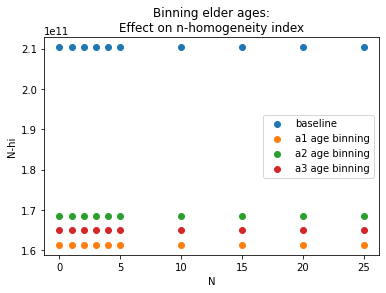

In [29]:
plt.scatter(hi.n,hi.hi_baseline, label = 'baseline')
plt.scatter(hi.n,hi.hi_a2_age_binning, label = 'a2 age binning')
plt.scatter(hi.n,hi.hi_a3_age_binning, label = 'a3 age binning')
plt.scatter(hi.n,hi.hi_a1_age_binning, label = 'a1 age binning')



plt.legend()
plt.title('Binning elder ages:\nEffect on n-homogeneity index')
plt.xlabel('N')
plt.ylabel('N-hi')
plt.show()

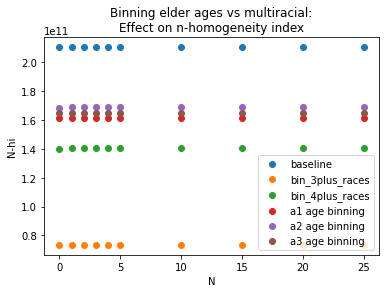

In [30]:
plt.scatter(hi.n,hi.hi_baseline, label = 'baseline')

plt.scatter(hi.n,hi.hi_a2_age_binning, label = 'a2 age binning')
plt.scatter(hi.n,hi.hi_a3_age_binning, label = 'a3 age binning')
plt.scatter(hi.n,hi.hi_a1_age_binning, label = 'a1 age binning')

plt.scatter(hi.n,hi.hi_bin_4plus_races, label = 'bin_4plus_races')
plt.scatter(hi.n,hi.hi_bin_3plus_races, label = 'bin_3plus_races')



plt.legend()
plt.title('Binning elder ages vs multiracial:\nEffect on n-homogeneity index')
plt.xlabel('N')
plt.ylabel('N-hi')
plt.show()

## compare relationship binning

In [33]:
relps = df.copy()
relps['relationship'] = relps.relationship.map(relp_label).map(relp_map)
relps = agg_data(relps, relp_var = 'relationship')

In [ ]:
n_relp = len(set(relp_map.values()))
n_bins = count_bins(relps, n_relp = n_relp)
hi['hi_bin_relp'] = [find_n_hi(relps, n, n_bins = n_bins) for n in hi.n]

In [ ]:
hi

In [ ]:
plt.scatter(hi.n,hi.hi_baseline, label = 'baseline')


plt.scatter(hi.n,hi.hi_a2_age_binning, label = 'a2 age binning')
plt.scatter(hi.n,hi.hi_a3_age_binning, label = 'a3 age binning')
plt.scatter(hi.n,hi.hi_a1_age_binning, label = 'a1 age binning')

plt.scatter(hi.n,hi.hi_bin_4plus_races, label = 'bin_4plus_races')
plt.scatter(hi.n,hi.hi_bin_relp, label = 'relationship binning')
plt.scatter(hi.n,hi.hi_bin_3plus_races, label = 'bin_3plus_races')


plt.legend()
plt.title('Binning elder ages vs multiracial vs relationships :\nEffect on n-homogeneity index')
plt.xlabel('N')
plt.ylabel('N-hi')
plt.show()